# Yahoo! News Scraper

In [3]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

#### Setup the url template and request headers

In [4]:
template = 'https://hub.united.com/united-announces-first-quarter-2020-financial-results-2645886449.html'

In [5]:
template

'https://hub.united.com/united-announces-first-quarter-2020-financial-results-2645886449.html'

In [6]:
url = template.format('us airways')

In [ ]:
url

'https://hub.united.com/united-announces-first-quarter-2020-financial-results-2645886449.html'

In [7]:
headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://in.yahoo.com/',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

#### Get the collection of articles

In [8]:
response = requests.get(template, headers=headers)

In [9]:
response

<Response [200]>

In [10]:
soup = BeautifulSoup(response.text, 'html.parser')

<!DOCTYPE html>

<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
<!-- Consider specifying the language of your content by adding the `lang` attribute to <html> -->
<!--[if lt IE 7]> <html lang="en" class="lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en" class="lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en" class="lt-ie9"> <![endif]-->
<!--[if IE 9]>    <html lang="en" class="lt-ie10"> <![endif]-->
<!--[if gt IE 9]><!--> <html lang="en"> <!--<![endif]-->
<head>
<style id="preloadstyle">.preloading{ background-size: 5px; background-color: #f2f2f0;background-image: url("/static/img/whitelabel/unitedhub/united_4p_h_rgb_r_V2.svg") !important;background-position: center center;background-repeat: no-repeat;min-height: 100vh;}</style>
<link href="https://static.rbl.ms" rel="preconnect"/>
<!-- For iOS: -->
<link href="/static/img/whitelabel/unitedhub/favicon180X180.png?1" rel="apple-touch-icon" sizes="180x180">
<link href="/s
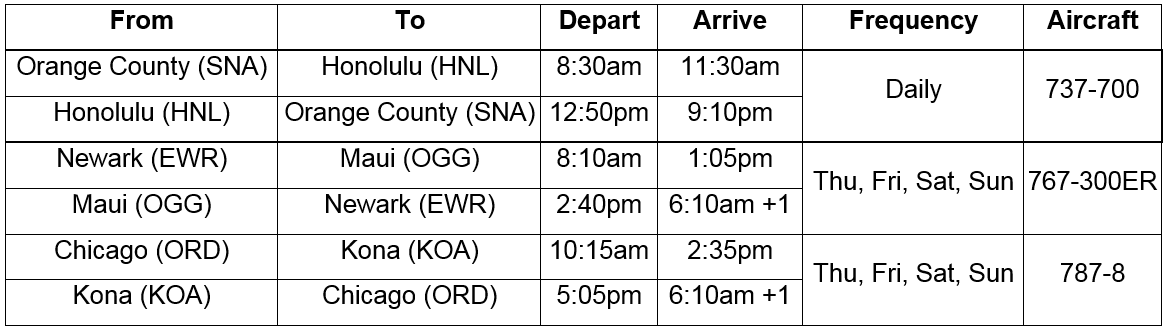
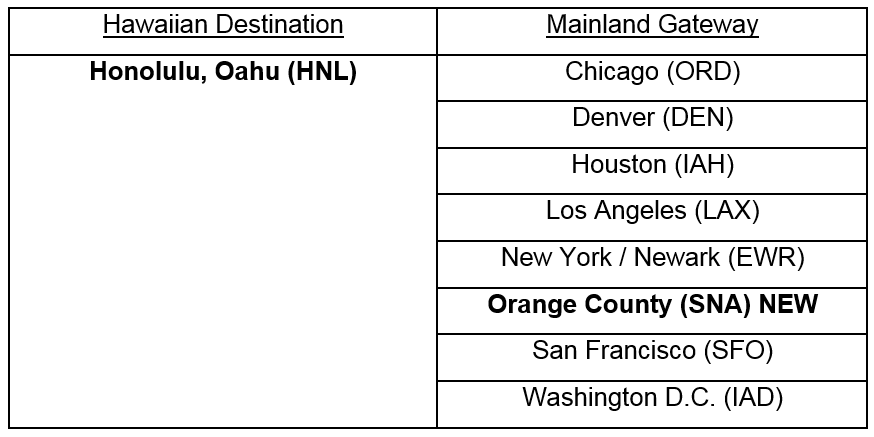
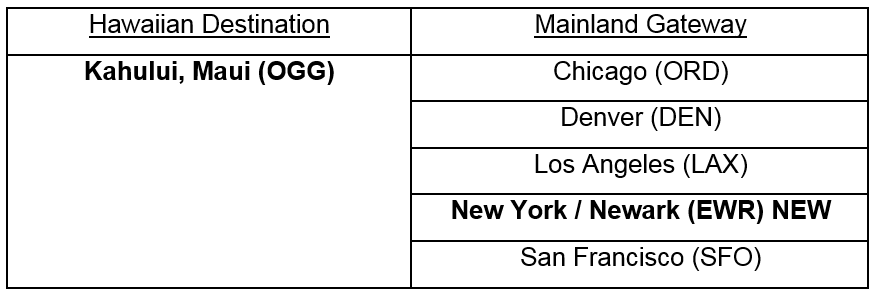
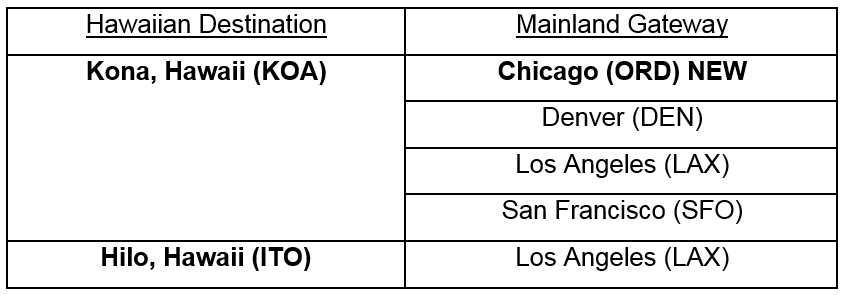
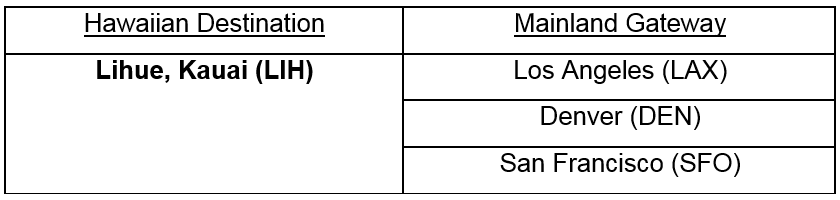

In [11]:
print(soup)

In [18]:
cards = soup.find_all('p')

In [19]:
len(cards)

3744

In [21]:
for i in cards:
  print(i.get_text())






Copyright © 2021 United Airlines, Inc.All rights reserved.




Indicates an external site that may or may not meet accessibility guidelines.

This link is to an external site that may or may not meet accessibility guidelines.
For members of the media only:Phone: (872) 825-8640
Email: media.relations@united.com
For customer service and all other inquiries, please contact Customer Care at united.com
CHICAGO, April 30, 2020 /PRNewswire/ -- United Airlines (UAL) today announced first quarter 2020 financial results with a net loss of $1.7 billion, and an adjusted net loss¹ of $639 million. The company also outlined U.S. airline industry-leading efforts to manage through the most disruptive global crisis in the history of aviation. The company's total liquidity as of the close of business on Wednesday, April 29, 2020 was approximately $9.6 billion, including $2 billion under its undrawn revolving credit facility. The company currently expects daily cash burn² to average between $40 mill

#### Create a prototype model for extracting article data

In [17]:
for i in cards:
  print(i)

<a aria-describedby="extdisclaimer" class="widget__headline custom-post-headline" href="https://www.united.com/cleanplus" target="_blank">
<svg class="posts-socialux-ticker__notice" height="16" viewbox="0 0 16 16" width="16">
<g fill-rule="evenodd">
<path d="M8 14.5a6.5 6.5 0 1 0 0-13 6.5 6.5 0 0 0 0 13zM8 16A8 8 0 1 1 8 0a8 8 0 0 1 0 16z" fill-rule="nonzero"></path>
<path d="M8 5.5a1 1 0 1 1 0-2 1 1 0 0 1 0 2zM7 7h2v5.5H7V7z"></path>
</g>
</svg>
<span class="widget__headline-text">
                Your health and safety is our top priority
        </span>
<i aria-hidden="true" class="fa fa-external-link"></i>
<span class="posts-socialux-ticker__button">
                Learn more
        </span>
</a>
<a aria-controls="global-main-menu" aria-expanded="false" class="global-header__hamburger js--globalmenu-toggle" href="javascript:;" id="global-main-menu-trigger">
<span class="global-header__hamburger-lines"></span>
<span class="accesibility-hidden-span">Toggle Main Menu</span>
</a>
<a h

In [ ]:
card = cards[0]

In [ ]:
headline = soup.find('h')

In [ ]:
print(headline)

None


In [ ]:
source = card.find("span", 's-source').text

In [ ]:
source

'USA Today'

In [ ]:
posted = card.find('span', 's-time').text.replace('·', '').strip()

In [ ]:
posted

'11 hours ago'

In [ ]:
description = card.find('p', 's-desc').text.strip()

The url needs a little more cleaning... the original URL is hiding inside the Yahoo! News link

In [ ]:
description

'Can turbulence cause an aircraft to crash? In the early days of commercial jets, there were a few...'

In [ ]:
raw_link = card.find('a').get('href')
raw_link

'https://r.search.yahoo.com/_ylt=AwrXgiMrjlRgQV4ANTzQtDMD;_ylu=Y29sbwNncTEEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1616182955/RO=10/RU=https%3a%2f%2fwww.usatoday.com%2fstory%2ftravel%2fcolumnist%2fcox%2f2021%2f03%2f18%2fcan-turbulence-alone-cause-airliner-crash-pilot-explains%2f4736110001%2f/RK=2/RS=VxsF1h5l6w2PeavcU2rreovOR0A-'

In [ ]:
unquoted_link = requests.utils.unquote(raw_link)
unquoted_link

'https://r.search.yahoo.com/_ylt=AwrXgiMrjlRgQV4ANTzQtDMD;_ylu=Y29sbwNncTEEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1616182955/RO=10/RU=https://www.usatoday.com/story/travel/columnist/cox/2021/03/18/can-turbulence-alone-cause-airliner-crash-pilot-explains/4736110001//RK=2/RS=VxsF1h5l6w2PeavcU2rreovOR0A-'

In [ ]:
pattern = re.compile(r'RU=(.+)\/RK')
clean_link = re.search(pattern, unquoted_link).group(1)
clean_link

'https://www.usatoday.com/story/travel/columnist/cox/2021/03/18/can-turbulence-alone-cause-airliner-crash-pilot-explains/4736110001/'

#### Generalize the model

In [ ]:
def get_article(card):
    """Extract article information from the raw html"""
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    clean_link = re.search(pattern, unquoted_link).group(1)
    
    article = (headline, source, posted, description, clean_link)
    return article

In [ ]:
articles = []
links = set()

for card in cards:
    article = get_article(card)
    link = article[-1]
    if not link in links:
        links.add(link)
        articles.append(article)

In [ ]:
articles[:5]

[("Can turbulence alone cause a plane to crash? Here's what an airline pilot had to say",
  'USA Today',
  '11 hours ago',
  'Can turbulence cause an aircraft to crash? In the early days of commercial jets, there were a few...',
  'https://www.usatoday.com/story/travel/columnist/cox/2021/03/18/can-turbulence-alone-cause-airliner-crash-pilot-explains/4736110001/'),
 ('NBA Rumors: Lakers Told What They Should Trade In Exchange For In-Demand Veteran',
  'International Business Times',
  '3 days ago',
  'Veteran forward PJ Tucker could be close to finally leaving the Houston Rockets. Things have gone a...',
  'https://www.ibtimes.com/nba-rumors-lakers-told-what-they-should-trade-exchange-demand-veteran-3162746'),
 ("'Orlando' word war: Melbourne airport may rearrange its name to settle lawsuit with rival",
  'USA TODAY via Yahoo News',
  '1 day ago',
  'Melbourne and Orlando airport officials appear on the verge of settling their five-year dispute and...',
  'https://news.yahoo.com/orlando

#### Get the next page

In [ ]:
url = soup.find('a', 'next').get('href')
url

'https://news.search.yahoo.com/search;_ylt=AwrXgiMrjlRgQV4AaDzQtDMD;_ylu=Y29sbwNncTEEcG9zAzEEdnRpZAMEc2VjA3BhZ2luYXRpb24-?p=us+airways&fr=sfp&fr2=sa-gp-search&b=11&pz=10&bct=0&xargs=0'

In [ ]:
# save article data
with open('thisisresult.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Headline', 'Source', 'Posted', 'Description', 'Link'])
    writer.writerows(articles)
        


#### Bringing it all together

In [ ]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

def get_article(card):
    """Extract article information from the raw html"""
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    clean_link = re.search(pattern, unquoted_link).group(1)
    
    article = (headline, source, posted, description, clean_link)
    return article

def get_the_news(search):
    """Run the main program"""
    template = 'https://news.search.yahoo.com/search?p={}'
    url = template.format(search)
    articles = []
    links = set()
    
    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'NewsArticle')
        
        # extract articles from page
        for card in cards:
            article = get_article(card)
            link = article[-1]
            if not link in links:
                links.add(link)
                articles.append(article)        
                
        # find the next page
        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break
            
    # save article data
    with open('results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Headline', 'Source', 'Posted', 'Description', 'Link'])
        writer.writerows(articles)
        
    return articles

In [ ]:
articles = get_the_news('usa airlines')

In [ ]:
articles[:5]

[('Airlines Almost Profitable Again as Bookings Soar',
  'AOL',
  '3 days ago',
  'Aviation leaders are expressing excitement that with COVID-19 vaccinations speeding up, the industry may recover sooner rather than later. Executives...',
  'https://www.aol.com/finance/airlines-almost-profitable-again-bookings-103152954.html'),
 ("John Kerry on maskless photo: 'If I dropped my mask to one ear on a flight, it was momentary'",
  'USA TODAY via Yahoo News',
  '18 hours ago',
  'The former secretary of state, senator and 2004 presidential candidate was photographed while...',
  'https://news.yahoo.com/john-kerry-maskless-photo-dropped-123549953.html'),
 ("'Historic and crippling' winter storm dumps over 25 inches of snow in Cheyenne, Wyoming; travel...",
  'USA TODAY via Yahoo News',
  '4 days ago',
  'Winter and spring collided Sunday as parts of Colorado, Wyoming, Utah and Nebraska were blasted with...',
  'https://news.yahoo.com/winter-storm-pounds-denver-could-132920630.html'),
 ('Alleg

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/results.csv')
data

Headline  ...                                               Link
0   iPhone 12 and iPhone 12 Pro: Everything we kno...  ...  https://finance.yahoo.com/news/iphone-12-comin...
1   iPhone 12 Mini, iPhone 12 And iPhone 12 Pro St...  ...  https://www.ibtimes.com/iphone-12-mini-iphone-...
2   The first iPhone 12 models to launch next mont...  ...  https://bgr.com/2020/09/29/iphone-12-release-d...
3   Apple Accident Confirms New iPhone 12, iPhone ...  ...  https://www.forbes.com/sites/gordonkelly/2020/...
4   iPhone 12 To Feature 64GB Base Storage, iPhone...  ...  https://wccftech.com/iphone-12-to-feature-64gb...
5   Apple Rumors: iPhone 12 May Not Come With EarP...  ...  https://www.ibtimes.com/apple-rumors-iphone-12...
6   iPhone 12 Pro Max, AirPods Studio And AirPower...  ...  https://www.ibtimes.com/iphone-12-pro-max-airp...
7        Report: Apple Is Launching an iPhone 12 Mini  ...  https://www.pcmag.com/news/report-apple-is-lau...
8   iPhone 12 won’t be an “insane” change for your...  ...  https://www.slashgear.com/iphone-12-wont-be-an...
9   Latest iPhone 12 Leak Confirmed Major Specs An...  ...  https://www.ibtimes.com/latest-iphone-12-leak-...
10  iPhone 12 launch date leaked - and it suggests...  ...  https://www.mirror.co.uk/tech/iphone-12-launch...
11                iPhone 12 Mini Might be Coming Soon  ...  http://www.itechpost.com/articles/103820/20200...
12             Everything we know about the iPhone 12  ...                 https://www.dailydot.com/?p=879502
13  Apple iPhone 12 launch event may be hosted on ...  ...  https://www.msn.com/en-in/money/topstories/app...
14       Report: Apple Is Launching an iPhone 12 Mini  ...  https://sea.pcmag.com/smartphones/39232/report...
15       Report: Apple Is Launching an iPhone 12 Mini  ...  https://au.pcmag.com/smartphones/68865/report-...
16         iPhone 12 price call reveals sobering news  ...  https://www.msn.com/en-gb/money/technology/iph...
17  'iPhone 12 mini' Name Appears in Leaked Apple ...  ...  https://www.macrumors.com/2020/09/25/iphone-12...
18  Apple Loop: iPhone 12 Details Confirmed, iOS 1...  ...  https://www.forbes.com/sites/ewanspence/2020/0...
19  From iPhone 12 announcement date to the new 12...  ...  https://japanese.engadget.com/from-i-phone-12-...
20  iPhone 12 launch date leaks online with 4 new ...  ...  https://www.the-sun.com/lifestyle/tech/1537434...
21  Hot News On Apple: iPad on Sale, iPhone 12 Lea...  ...  https://www.thestreet.com/apple/news/hot-news-...
22  iPhone 12 mini just confirmed in new leak — he...  ...  https://www.tomsguide.com/news/iphone-12-mini-...
23  Apple text scam circulating that claims you've...  ...  https://www.mirror.co.uk/tech/apple-text-scam-...
24  OnePlus 8T reveals its secret for taking on th...  ...  https://www.msn.com/en-gb/money/technology/one...
25  iPhone 12 braided USB-C may finally fix Apple ...  ...  https://www.slashgear.com/iphone-12-braided-us...
26         Apple’s iPhone SE Faces Its Biggest Threat  ...  https://www.forbes.com/sites/ewanspence/2020/0...
27  New iPhone 12 release date, specs, price, leak...  ...  https://www.radiotimes.com/technology/2020-09-...
28  A photo of a sticker that says "iPhone 12 mini...  ...  https://japanese.engadget.com/a-photo-of-a-sti...
29  Everything we know about the iPhone 12 and iPh...  ...  https://9to5mac.com/2020/09/28/iphone-12-featu...
30  iPhone users say iOS 14 is draining their batt...  ...  https://www.mirror.co.uk/tech/iphone-users-say...
31  New Images Leak of iPhone 12 Braided USB-C to ...  ...  https://www.macrumors.com/2020/09/24/leaked-ip...
32                   Palantir IPO: Deep-Dive Analysis  ...  https://www.forbes.com/sites/bethkindig/2020/0...
33  AirPods Studio release date, specs, design: Wi...  ...  http://www.econotimes.com/AirPods-Studio-relea...
34  Google Pixel 5 launch: release date, specs and...  ...  https://www.msn.com/en-gb/money/technology/goo...
35  Huawei Mate 40 Pro New Details Leak Showing Go...  ...  https://www.forbes.com/si

In [ ]:
import requests

from bs4 import BeautifulSoup



URL = 'https://finance.yahoo.com/most-active?count=150'

headers = {

    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'}

page = requests.get(URL, headers=headers)

soup = BeautifulSoup(page.text, 'html.parser')

stock_elems = soup.select(".simpTblRow")

for stock_elem in stock_elems:

    symbol = stock_elem.select("td:nth-of-type(1)")[0].text

    name = stock_elem.select("td:nth-of-type(2)")[0].text

    last_price = stock_elem.select("td:nth-of-type(3)")[0].text

    change = stock_elem.select("td:nth-of-type(4)")[0].text

    change_in_percentage = stock_elem.select("td:nth-of-type(5)")[0].text

In [ ]:
symbol
name
last_price
change
change_in_percentage

'-5.28%'

In [ ]:
dic1 = {'symbol':0,'name':1,'last_price':2,'change':3,'change_in_precentage':4}

In [ ]:
print(dic1)

{'symbol': 0, 'name': 1, 'last_price': 2, 'change': 3, 'change_in_precentage': 4}


In [ ]:
dic1['symbol'] = symbol
dic1['name'] = name
dic1['last_price'] = last_price
dic1['change'] = change
dic1['change_in_precentage'] = change_in_percentage

In [ ]:
dic1['symbol']

'SPCE'

In [ ]:
final


[{'change': '-1.78',
  'change_in_precentage': '-5.28%',
  'last_price': '31.96',
  'name': 'Virgin Galactic Holdings, Inc.',
  'symbol': 'SPCE'}]

In [ ]:
with open('results4.csv', 'w', newline='', encoding='utf-8') as f:
      writer = csv.writer(f)
      writer.writerow(['symbol','name','last_price','change','change_in_percentage'])
      writer.writerows(final)
        



In [ ]:
from xlsxwriter import Workbook
ordered_list=['change','change_in_precentage','last_price','name','symbol'] #list object calls by index but dict object calls items randomly
wb=Workbook("Final_Output.xlsx")
ws=wb.add_worksheet("New Sheet") #or leave it blank, default name is "Sheet 1"
first_row=0
for header in ordered_list:
    col=ordered_list.index(header) # we are keeping order.
    ws.write(first_row,col,header) # we have written first row which is the header of worksheet also.
row=1
for j in final: 
    #print(j)
    for _key,_value in j.items():
        col=ordered_list.index(_key)
        ws.write_row(row,col,_value)
    row+=1 #enter the next row
wb.close()

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 4.9MB/s 


In [ ]:
data = pd.read_csv('results4.csv')

In [ ]:
pd.read_excel("Final_Output.xlsx")
# Preview of Excel file

change change_in_precentage  last_price  ... Unnamed: 30  Unnamed: 31  Unnamed: 32
0      -                    -           5  ...           n            c            .

[1 rows x 33 columns]

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/content/thisisresult.csv')

In [ ]:
data

Headline  ...                                               Link
0  Can turbulence alone cause a plane to crash? H...  ...  https://www.usatoday.com/story/travel/columnis...
1  NBA Rumors: Lakers Told What They Should Trade...  ...  https://www.ibtimes.com/nba-rumors-lakers-told...
2  'Orlando' word war: Melbourne airport may rear...  ...  https://news.yahoo.com/orlando-word-war-melbou...
3  Hero US Airways Pilot Sully Sullenberger Appea...  ...  https://www.yahoo.com/huffpost/sully-sulllenbe...
4  Court Ruling Revives a US Airways Antitrust Ca...  ...  https://finance.yahoo.com/news/court-ruling-re...
5  US Airways Group, Inc. -- Moody's assigns Ba2 ...  ...  https://finance.yahoo.com/news/us-airways-grou...
6  American Airlines just announced 5 new routes ...  ...  https://news.yahoo.com/american-airlines-just-...
7  9 iconic airlines that were once household nam...  ...  https://news.yahoo.com/9-iconic-airlines-were-...
8  The past 2 decades saw the number of major air...  ...  https://news.yahoo.com/past-2-decades-saw-numb...
9  Biden Flashes Warning to Big Tech as Antitrust...  ...  https://finance.yahoo.com/news/biden-flashes-w...

[10 rows x 5 columns]

In [ ]:
data.iloc[1,0]

'NBA Rumors: Lakers Told What They Should Trade In Exchange For In-Demand Veteran'

In [ ]:
data.iloc[1,3]

'Veteran forward PJ Tucker could be close to finally leaving the Houston Rockets. Things have gone a...'